<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer: 

Input layer (also called visible layer) takes a shape of a dataset (data that we are passing into the  network). On the diagram we reviewed during the lecture they are colored in yellow. It passes information to a hidden layer. 

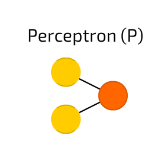

### Hidden Layer:

Hidden layer is where the term Deep Learning comes in because a Neural Network consists of multiple hidden layers (the more layers the deeper the network gets). It is called hidden because it cannot be accessed directly and we do not interact with them. Only through input or visible layer, which does all the computations such as multiplying all the inputs by weight. The output of the first hidden layer is the input of the second hidden layer and so on. For example, perceptrons do not have hidden layers, we go straight from input to output. On the diagram that we reviewed during the lecture they are colored in green. 


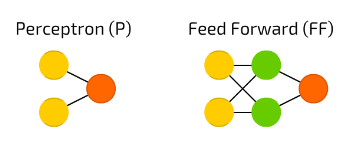


### Output Layer:

Ouput layer determines what our model is trying to predict (whether it is a Regression or Classification). Based on the activation function we can determine whether it is a Regression or Classification problem. For example, in case of a Regression problem, it can output a single number; in case of a Binary Classification it can output either 0 or 1 and we would use a sigmoid function (or sometimes a probability). If we have 10 classes we would have 10 nodes in the output layer and we would use a softmax activation function. On the diagram that we reviewed during the lecture they are colored in orange. 

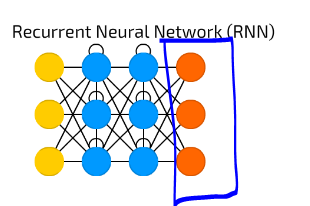


### Neuron:

A neuron is a mathematical function that takes one or more inputs, multiplies them by weights and adds them together. This value is then passed to a non-linear function also knows as an activation function (such as sigmoid or softmax) and becomes the neuron's output. 


### Weight:

A weight is the parameter within a neural network that transforms input data within the network's hidden layers.
A weight brings down the importance of the input value. Weights near zero means changing this input will not change the output. Negative weights mean increasing this input will decrease the output. A weight decides how much influence the input will have on the output.


### Activation Function:

Activation functions are mathematical equations that determine the output of a neural network. The function is attached to each neuron in the network, and determines whether it should be activated (“fired”) or not, based on whether each neuron’s input is relevant for the model’s prediction. Activation functions also help normalize the output of each neuron to a range between 1 and 0 or between -1 and 1.

The purpose of the activation function is to introduce non-linearity into the output of a neuron.


### Node Map:

Artificial neural networks have two main hyperparameters that control the architecture or topology of the network: the number of layers and the number of nodes in each hidden layer. The layers are made of nodes. A basic neural network takes an input(s) which is modified by a weight and reports an output.    

### Perceptron:

A perceptron is a single-layer neural network. It consists of four main parts including input values, weights and bias, net sum, and an activation function.


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?




Y = activation_function(input1*weight1 + input2*weight2 + ...input_n*weight_n + bias)

A neural network takes an input (input layer) 

A neuron or a node receives input from some other nodes, or from an external source and computes an output. Each input has an associated weight, which is assigned on the basis of its relative importance to other inputs. We multiply each input with its corresponding weight and add the sum of all inputs and weights to a bias. Then the node applies an activation function to the weighted sum of its inputs. A bias allows to shift activation function by adding a constant to an input to better fit the data. And then we get an output. 

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [1]:
import pandas as pd
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')
df

,x1,x2,y
0,0,0,1
1,1,0,1
2,0,1,1
3,1,1,0


In [28]:
correct_outputs = [[0], [1], [0], [1]] # same and the first column
correct_outputs

[[0], [1], [0], [1]]

In [29]:
# Sigmoid activation function and its derivative for updating weights
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1 - sx)

In [30]:
import numpy as np
# Initialize random weights for our inputs
weights = 2 * np.random.random((3,1)) - 1 
weights

array([[-0.78681527],
       [-0.76713672],
       [-0.96750831]])

In [31]:
# Calculate weighted sum of inputs and weights
weighted_sum = np.dot(df, weights)
weighted_sum

array([[-0.96750831],
       [-1.75432359],
       [-1.73464504],
       [-1.553952  ]])

In [32]:
# Output the activated value for the end of 1 training epoch
activated_outputs = sigmoid(weighted_sum)
activated_outputs

array([[0.27537743],
       [0.1475027 ],
       [0.14999439],
       [0.17451621]])

In [33]:
# Take difference of output and true values to calculate error
error = correct_outputs - activated_outputs
error

array([[-0.27537743],
       [ 0.8524973 ],
       [-0.14999439],
       [ 0.82548379]])

In [34]:
adjustments = error * sigmoid_derivative(weighted_sum)
adjustments

# what directions adjustments need to be in

array([[-0.05495011],
       [ 0.10719783],
       [-0.0191237 ],
       [ 0.11891944]])

In [35]:
weights += np.dot(df.T, adjustments) 
weights # updated were made based on the errors

array([[-0.560698  ],
       [-0.66734098],
       [-0.93438429]])

In [36]:
# Steps we've already done: 
# 1. Randomly Initialized Weights already. Those are in memory as `weights`
# 2. We've already got input data & correct_outputs


# Update our weights 10,000 times - (fingers crossed that this process reduces error)
for iteration in range(10000):
    
    # Weighted sum of inputs / weights
    weighted_sum = np.dot(df, weights)
    
    # Activate!
    activated_output = sigmoid(weighted_sum)
    
    # Cac error
    error = correct_outputs - activated_output
    
    adjustments = error * sigmoid_derivative(weighted_sum)
    
    # Update the Weights
    weights += np.dot(df.T, adjustments)
    
print("Weights after training")
print(weights)

print("Output after training")
print(activated_output)

Weights after training
[[ 8.99037868]
 [-1.40107984]
 [-4.4076042 ]]
Output after training
[[0.01203827]
 [0.98987653]
 [0.00299257]
 [0.99949437]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [44]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [45]:
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn import preprocessing
import numpy as np

feats = list(diabetes)[:-1]

X = diabetes[feats].values
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [46]:
y = diabetes['Outcome'].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [54]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
x_scaled

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [55]:
class Perceptron(object):
    
    def __init__(self, rate = 0.02, niter = 10):
        self.rate = rate
        self.niter = niter
        
    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # weights
        self.weight = np.random.random(1 + X.shape[1])

        # Number of misclassifications
        self.errors = []  # Number of misclassifications

        for i in range(self.niter):
          err = 0
          for xi, target in zip(X, y):
            delta_w = self.rate * (target - self.predict(xi))
            self.weight[1:] += delta_w * xi
            self.weight[0] += delta_w
            err += int(delta_w != 0.0)
          self.errors.append(err)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.weight[1:]) + self.weight[0]

    def predict(self, X):
        """Return class label after unit step"""
        """ Default Step Function"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

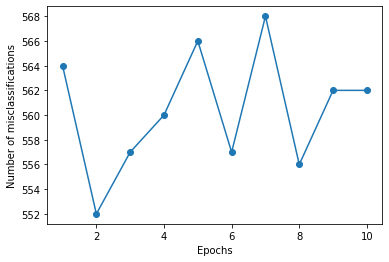

In [56]:
import matplotlib.pyplot as plt
pn = Perceptron(0.1, 10)
pn.fit(x_scaled, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()


## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?